<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(0)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_0'

In [4]:
os.listdir(base_path)

['data_add_delta_0_n20.csv',
 'data_add_delta_0_n30.csv',
 'data_add_delta_0_n60.csv',
 'data_add_delta_0_n120.csv',
 'data_add_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,80.925571,74.774609,0.056505,165.756684,165.685881,0.070804
1,0.0,1.0,88.038251,80.740424,0.827552,179.606228,178.756706,0.849522
2,0.0,2.0,62.715808,58.016045,0.349726,131.081579,130.733465,0.348113
3,0.0,3.0,58.371317,64.200132,-0.237275,132.334174,132.602429,-0.268255
4,0.0,4.0,69.300871,55.136165,0.060996,134.498032,134.410443,0.087589
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,81.601547,82.801360,-0.946988,173.455919,174.364051,-0.908132
249996,999.0,246.0,80.101575,20.682938,0.914881,111.699395,110.878255,0.821140
249997,999.0,247.0,29.939157,84.163878,-0.322061,123.780974,124.089278,-0.308304
249998,999.0,248.0,66.522999,34.058713,-0.036033,110.545679,110.654433,-0.108754


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,80.925571,74.774609,0.056505,165.756684,165.685881,0.070804
1,0.0,1.0,88.038251,80.740424,0.827552,179.606228,178.756706,0.849522
2,0.0,2.0,62.715808,58.016045,0.349726,131.081579,130.733465,0.348113
3,0.0,3.0,58.371317,64.200132,-0.237275,132.334174,132.602429,-0.268255
4,0.0,4.0,69.300871,55.136165,0.060996,134.498032,134.410443,0.087589
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,81.601547,82.801360,-0.946988,173.455919,174.364051,-0.908132
249996,999.0,246.0,80.101575,20.682938,0.914881,111.699395,110.878255,0.821140
249997,999.0,247.0,29.939157,84.163878,-0.322061,123.780974,124.089278,-0.308304
249998,999.0,248.0,66.522999,34.058713,-0.036033,110.545679,110.654433,-0.108754


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    80.925571  74.774609  0.056505  165.756684  165.685881  0.070804
      1.0    88.038251  80.740424  0.827552  179.606228  178.756706  0.849522
      2.0    62.715808  58.016045  0.349726  131.081579  130.733465  0.348113
      3.0    58.371317  64.200132 -0.237275  132.334174  132.602429 -0.268255
      4.0    69.300871  55.136165  0.060996  134.498032  134.410443  0.087589
...                ...        ...       ...         ...         ...       ...
999.0 245.0  81.601547  82.801360 -0.946988  173.455919  174.364051 -0.908132
      246.0  80.101575  20.682938  0.914881  111.699395  110.878255  0.821140
      247.0  29.939157  84.163878 -0.322061  123.780974  124.089278 -0.308304
      248.0  66.522999  34.058713 -0.036033  110.545679  110.654433 -0.108754
      249.0  98.799425  55.844177 -0.006735  164.636867  164.652619 -0.015752

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    80.925571  74.774609  0.056505  165.756684  165.685881  0.070804
      1.0    88.038251  80.740424  0.827552  179.606228  178.756706  0.849522
      2.0    62.715808  58.016045  0.349726  131.081579  130.733465  0.348113
      3.0    58.371317  64.200132 -0.237275  132.334174  132.602429 -0.268255
      4.0    69.300871  55.136165  0.060996  134.498032  134.410443  0.087589
...                ...        ...       ...         ...         ...       ...
999.0 245.0  81.601547  82.801360 -0.946988  173.455919  174.364051 -0.908132
      246.0  80.101575  20.682938  0.914881  111.699395  110.878255  0.821140
      247.0  29.939157  84.163878 -0.322061  123.780974  124.089278 -0.308304
      248.0  66.522999  34.058713 -0.036033  110.545679  110.654433 -0.108754
      249.0  98.799425  55.844177 -0.006735  164.636867  164.652619 -0.015752

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,80.925571,74.774609,0.056505,165.756684,165.685881,0.070804
1,0.0,1.0,88.038251,80.740424,0.827552,179.606228,178.756706,0.849522
2,0.0,2.0,62.715808,58.016045,0.349726,131.081579,130.733465,0.348113
3,0.0,3.0,58.371317,64.200132,-0.237275,132.334174,132.602429,-0.268255
4,0.0,4.0,69.300871,55.136165,0.060996,134.498032,134.410443,0.087589
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,81.601547,82.801360,-0.946988,173.455919,174.364051,-0.908132
249996,999.0,246.0,80.101575,20.682938,0.914881,111.699395,110.878255,0.821140
249997,999.0,247.0,29.939157,84.163878,-0.322061,123.780974,124.089278,-0.308304
249998,999.0,248.0,66.522999,34.058713,-0.036033,110.545679,110.654433,-0.108754


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    80.925571  74.774609  0.056505  165.756684  165.685881  0.070804
      1.0    88.038251  80.740424  0.827552  179.606228  178.756706  0.849522
      2.0    62.715808  58.016045  0.349726  131.081579  130.733465  0.348113
      3.0    58.371317  64.200132 -0.237275  132.334174  132.602429 -0.268255
      4.0    69.300871  55.136165  0.060996  134.498032  134.410443  0.087589
...                ...        ...       ...         ...         ...       ...
999.0 245.0  81.601547  82.801360 -0.946988  173.455919  174.364051 -0.908132
      246.0  80.101575  20.682938  0.914881  111.699395  110.878255  0.821140
      247.0  29.939157  84.163878 -0.322061  123.780974  124.089278 -0.308304
      248.0  66.522999  34.058713 -0.036033  110.545679  110.654433 -0.108754
      249.0  98.799425  55.844177 -0.006735  164.636867  164.652619 -0.015752

[250000 rows x 6 columns]

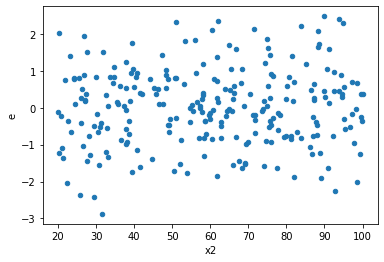

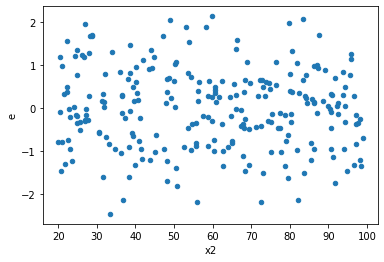

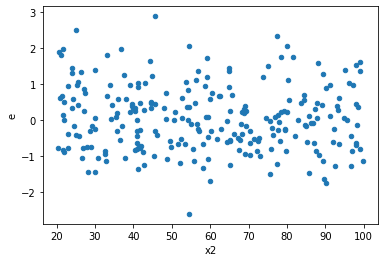

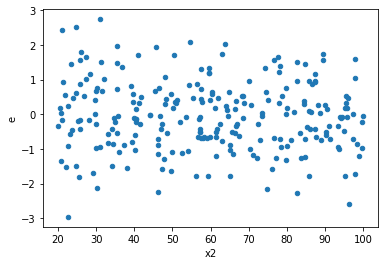

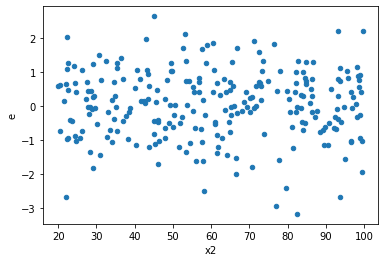

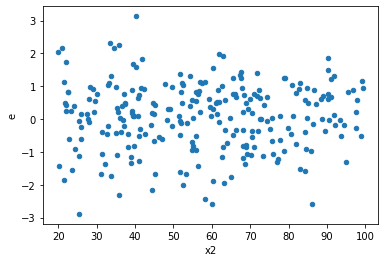

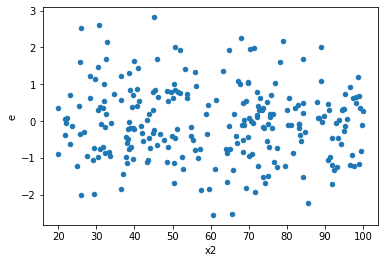

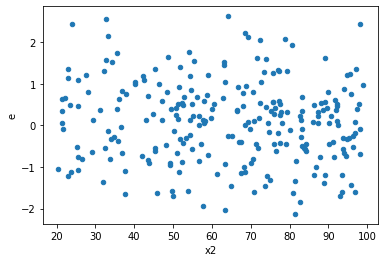

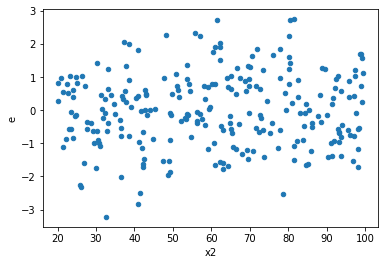

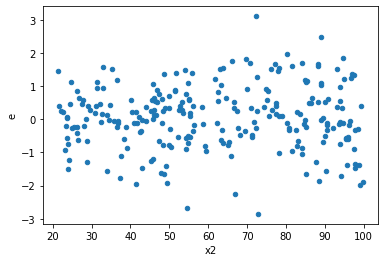

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,98.0,98.0,102.56604979387632,108.10518197895723,1.0465923448354726,1.1031141018260942,1.0540055134833868,0.7951206308975918,0.6024396845512041,0.3975603154487959,Reject001=1 : Homoscedasticity
1.0,98.0,98.0,81.55791709193637,81.61652504469356,0.8322236437952691,0.8328216841295262,1.0007186053156694,0.997170245607744,0.501414877196128,0.498585122803872,Reject001=1 : Homoscedasticity
4.0,98.0,98.0,92.7840293287118,99.46963655740605,0.946775809476651,1.0149962914021025,1.0720555819472846,0.7312365432354211,0.6343817283822895,0.36561827161771054,Reject001=1 : Homoscedasticity
8.0,98.0,98.0,113.5561164837481,114.98754647798096,1.1587358824872256,1.1733423109998056,1.0126054856273436,0.9506856138494975,0.5246571930752513,0.47534280692474873,Reject001=1 : Homoscedasticity
9.0,98.0,98.0,51.61130822168212,110.99511256724281,0.5266460022620625,1.1326031894616613,2.1505967663228756,0.00018698212806356196,0.9999065089359682,9.349106403178098e-05,Reject001=0 : Heteroscedasticity
11.0,98.0,98.0,70.57626677035644,94.42761979881907,0.7201659874526167,0.9635471408042762,1.3379514689558603,0.15132222773018933,0.9243388861349053,0.07566111386509466,Reject001=1 : Homoscedasticity
14.0,98.0,98.0,82.61498784783531,101.84788157780808,0.8430100800799522,1.0392640977327354,1.232801507704594,0.30190754323846836,0.8490462283807658,0.15095377161923418,Reject001=1 : Homoscedasticity
15.0,98.0,98.0,80.06901019103793,83.2179415171362,0.817030716235081,0.8491626685422061,1.0393277164109458,0.8489646590769142,0.5755176704615429,0.4244823295384571,Reject001=1 : Homoscedasticity
17.0,98.0,98.0,94.21577309750433,134.39199835092364,0.9613854397704523,1.3713469219482004,1.4264278043108638,0.08029537733732361,0.9598523113313382,0.04014768866866181,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,102.56604979387632,108.10518197895723,1.0465923448354726,1.1031141018260942,1.0540055134833868,0.7951206308975918,Reject001=1 : Homoscedasticity
1.0,98.0,98.0,81.55791709193637,81.61652504469356,0.8322236437952691,0.8328216841295262,1.0007186053156694,0.997170245607744,Reject001=1 : Homoscedasticity
2.0,98.0,98.0,85.79851522994717,66.31086362103608,0.8754950533668079,0.6766414655207763,0.7728672628345309,0.20397953696008878,Reject001=1 : Homoscedasticity
3.0,98.0,98.0,108.44637125702326,81.58835547372168,1.106595625071666,0.8325342395277722,0.7523382712396456,0.16073503621530305,Reject001=1 : Homoscedasticity
4.0,98.0,98.0,92.7840293287118,99.46963655740605,0.946775809476651,1.0149962914021025,1.0720555819472846,0.7312365432354211,Reject001=1 : Homoscedasticity
5.0,98.0,98.0,116.10910368365383,90.51099465418794,1.1847867722821819,0.9235815781039586,0.7795340053678352,0.21942492299494865,Reject001=1 : Homoscedasticity
6.0,98.0,98.0,102.44482726923113,88.27364033218839,1.045355380298277,0.9007514319611061,0.8616700587546503,0.46251197020658946,Reject001=1 : Homoscedasticity
7.0,98.0,98.0,92.66724818177877,87.89048951237632,0.9455841651201916,0.8968417297181257,0.9484525680526066,0.7938801752020141,Reject001=1 : Homoscedasticity
8.0,98.0,98.0,113.5561164837481,114.98754647798096,1.1587358824872256,1.1733423109998056,1.0126054856273436,0.9506856138494975,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      990
Reject001=0 : Heteroscedasticity     10
Name: Result_test, dtype: int64